In [3]:
from sklearn.datasets import fetch_openml

In [5]:
mnist =fetch_openml('mnist_784')

In [6]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [10]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [11]:
x,y=mnist['data'],mnist['target']

In [24]:
x.iloc[0].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [17]:
x.shape

(70000, 784)

In [18]:
y.shape

(70000,)

In [19]:
%matplotlib inline

In [20]:
import matplotlib 
import matplotlib.pyplot as plt

In [27]:
some_digit=x.iloc[36000].values
some_digit.shape


(784,)

In [28]:
some_digit_image=some_digit.reshape(28,28)

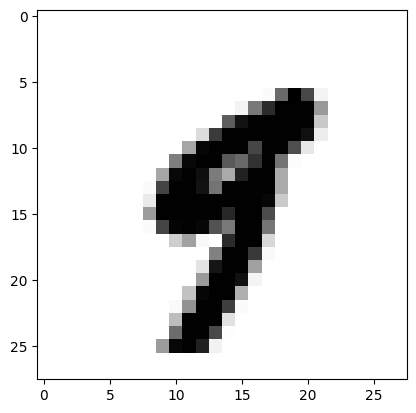

In [50]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [51]:
y.iloc[36000]

'9'

In [55]:
x_train =x.iloc[:60000].values
x_test =x.iloc[60000:].values

In [57]:
y_train=y.iloc[:60000].values
y_test=y.iloc[60000:].values

In [58]:
import numpy as np 
shuffle_index=np.random.permutation(60000)
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]


Creating a 2 detector

In [65]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)
y_train_2

array([False, False, False, ..., False, False, False])

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
clf=LogisticRegression()

In [66]:
clf.fit(x_train,y_train_2)

c:\Users\aryan\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
clf.predict([some_digit])

array([False])

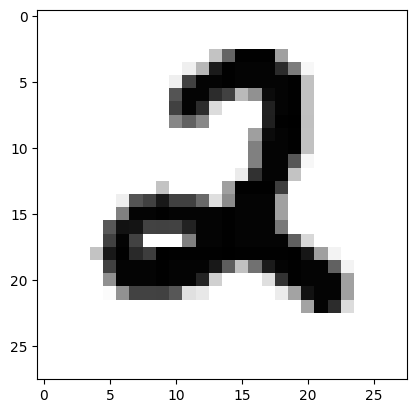

In [77]:
some_digit_2=x.iloc[213].values
some_digit_2_image=some_digit_2.reshape(28,28)
plt.imshow(some_digit_2_image,cmap=matplotlib.cm.binary,interpolation="nearest")

In [79]:
clf.predict([some_digit_2])

array([ True])

In [81]:
#cross validation 
from sklearn.model_selection import cross_val_score
cv_acc=cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

c:\Users\aryan\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aryan\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

- But the accuracy metric is not the best metric for this case since 
there is 90% data that is not 2.
So even if i classify all data as not true i will get 90% accuracy.

In [83]:
cv_acc.mean()

np.float64(0.9785333333333334)

Calculating Confusion Matrix

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,x_train,y_train_2,cv=3)
y_train_pred

c:\Users\aryan\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aryan\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

array([False, False, False, ..., False, False, False])

In [88]:
confusion_matrix(y_train_2,y_train_pred)

array([[53585,   457],
       [  831,  5127]])

Precision and Recall

In [89]:
from sklearn.metrics import precision_score,recall_score

In [90]:
precision_score(y_train_2,y_train_pred)

np.float64(0.9181590257879656)

In [91]:
recall_score(y_train_2,y_train_pred)

np.float64(0.8605236656596174)

Calculating F1 Score

In [92]:
from sklearn.metrics import f1_score
f1_score(y_train_2,y_train_pred)

np.float64(0.8884075550164616)

Precision-Recall Trade-off Curve

In [95]:
y_scores=cross_val_predict(clf,x_train,y_train_2,cv=3,method="decision_function")
y_scores

c:\Users\aryan\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\aryan\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

array([-2.44590632, -9.73985142, -4.49356552, ..., -6.29546556,
       -2.86761893, -4.78702112])

In [97]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_2,y_scores)

In [99]:
thresholds

array([-48.19322034, -46.2565651 , -44.00726128, ...,  18.54001541,
        19.00810402,  20.81496246])

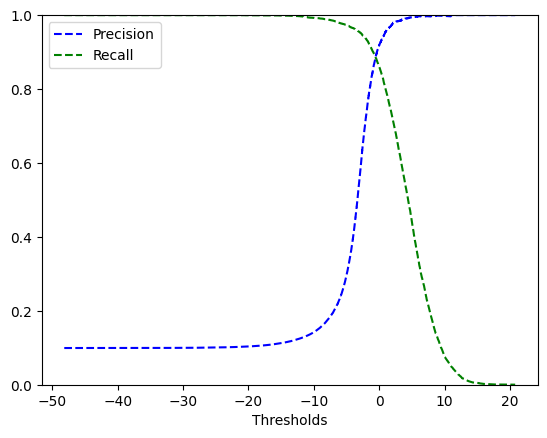

In [103]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g--",label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()